# Credit Card Fraud Detection using Data Mining and Machine Learning

## Project Description
The chosen project revolves around credit card fraud detection using a dataset sourced from Kaggle. The dataset comprises credit card transactions made by European cardholders in the year 2023. With over 550,000 records, the data has been anonymized to ensure the privacy of the cardholders while presenting a rich ground for the development of robust fraud detection algorithms. The main goal of this project is to leverage data mining and machine learning techniques to identify and prevent potentially fraudulent transactions.




1. id: Unique identifier for each transaction
1. V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
1. Amount: The transaction amount
1. Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

## Load Data
We start by loading the dataset and displaying the first few rows to understand its structure.


In [1]:
import pandas as pd 
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# Data analysis

### We plot all columns in a box plot to identify any noticeable outliers.

<Axes: title={'center': 'Features'}>

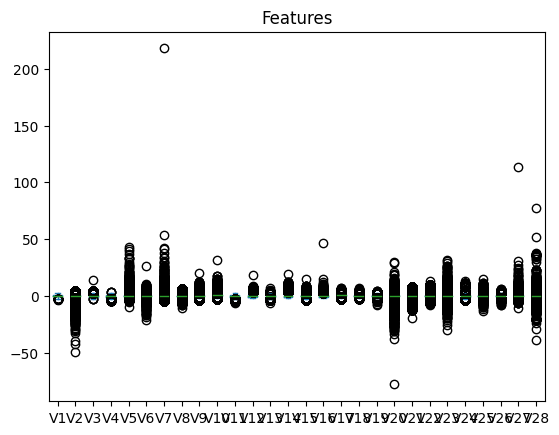

In [2]:
df[df.columns[1:-2]].plot(kind="box", title="Features")

##### There are noticeable outliers through all, so we will go through all of them one by one.

##### Also, amount has no correlation with others, since it is free to be big or small

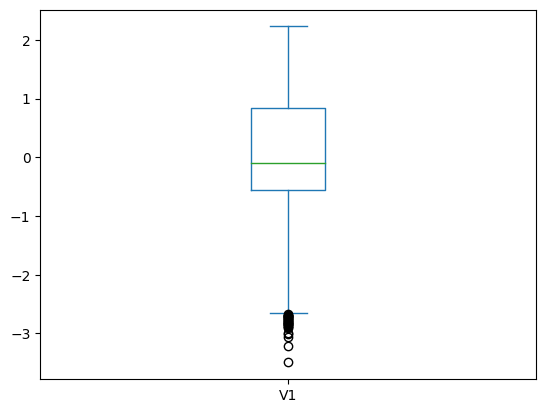

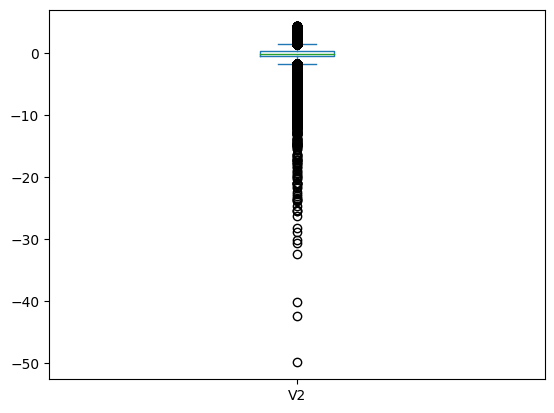

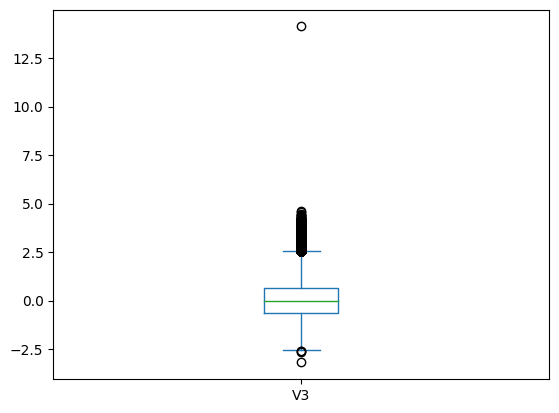

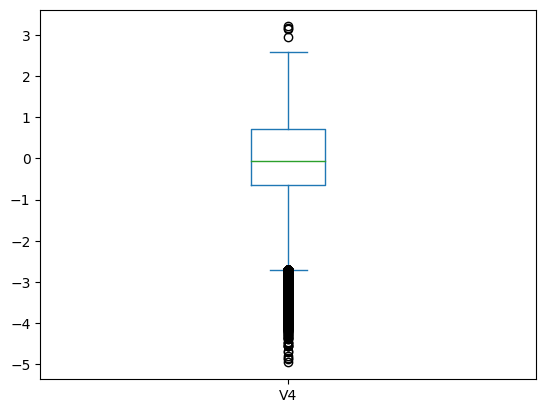

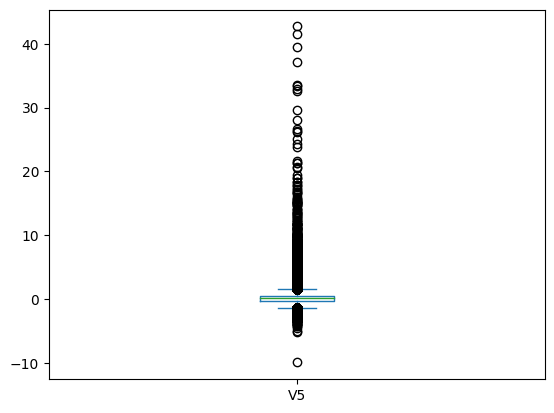

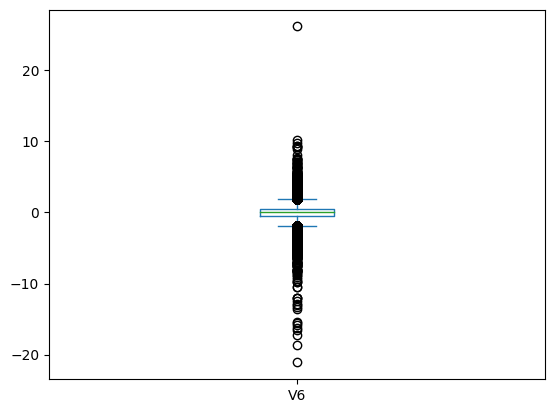

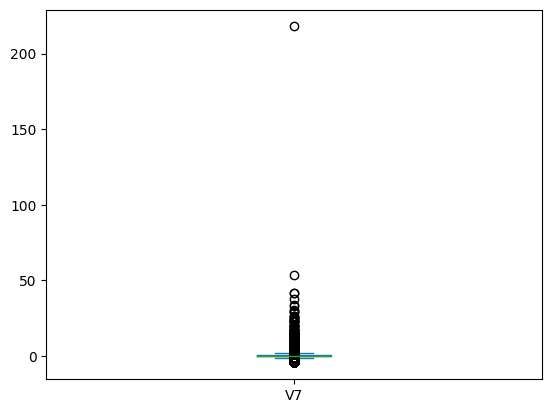

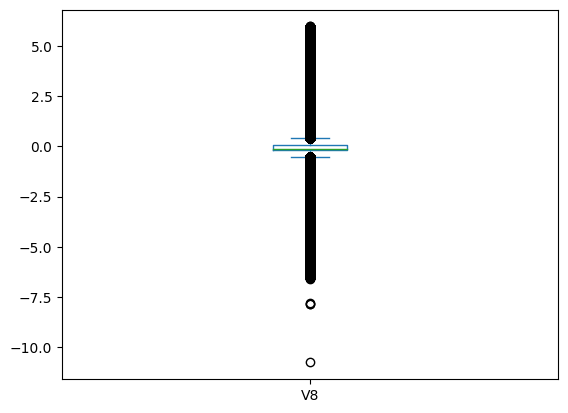

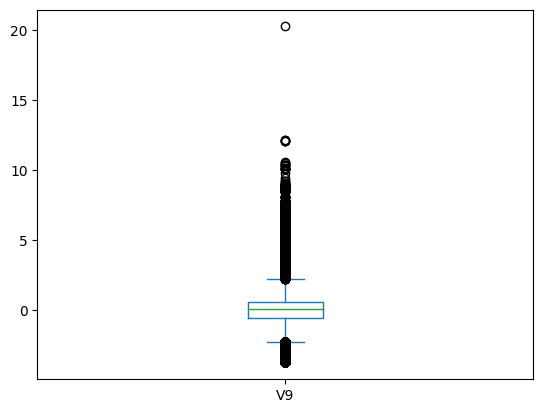

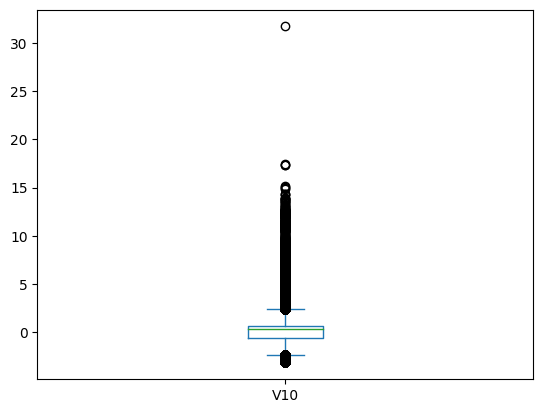

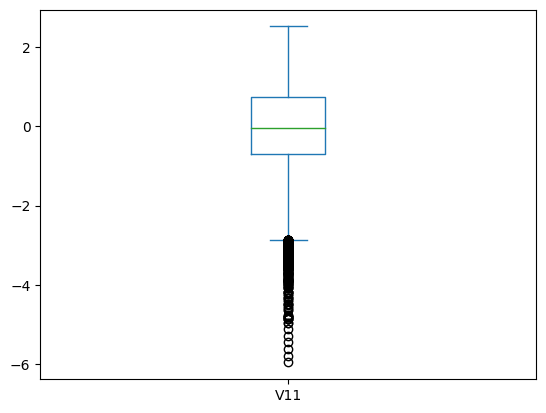

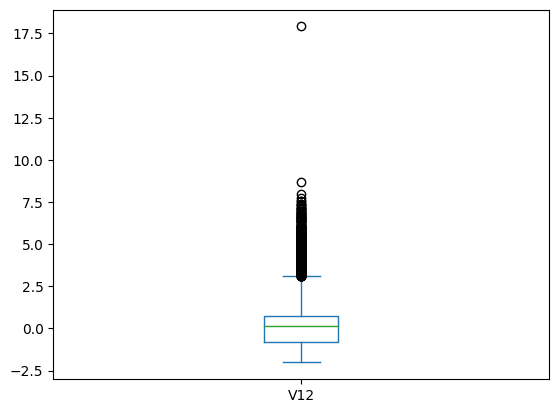

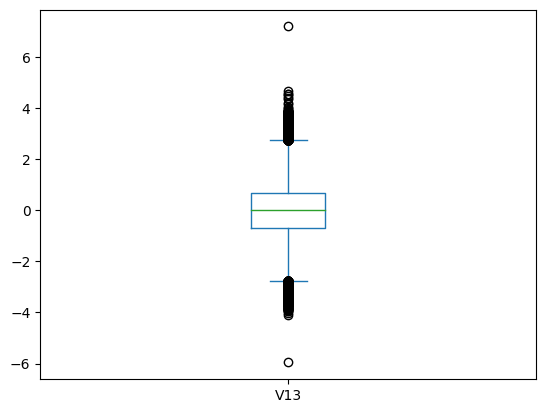

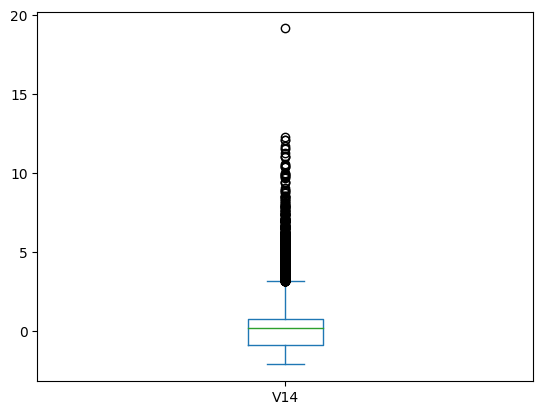

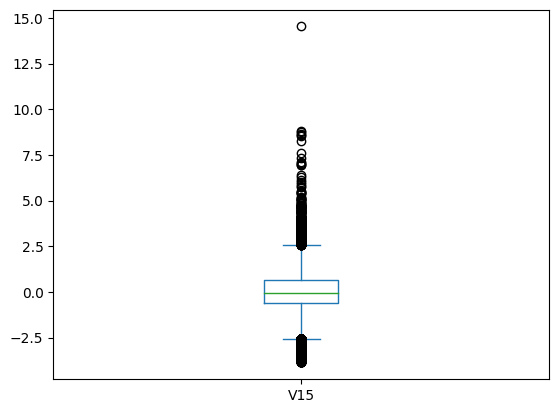

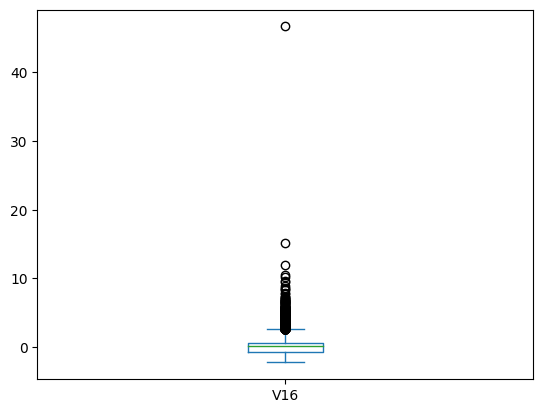

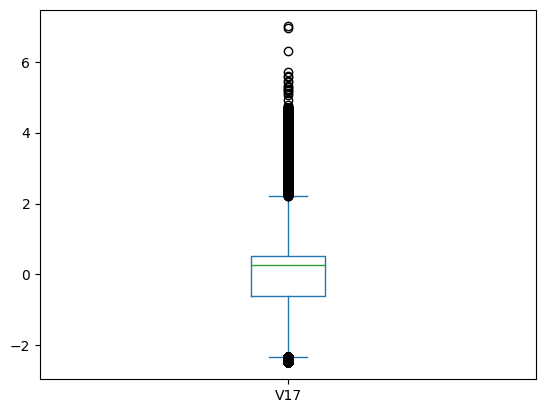

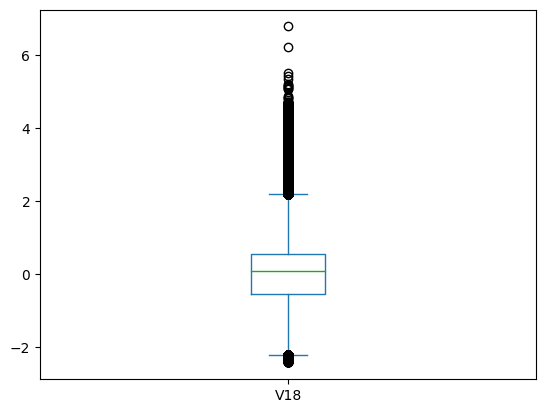

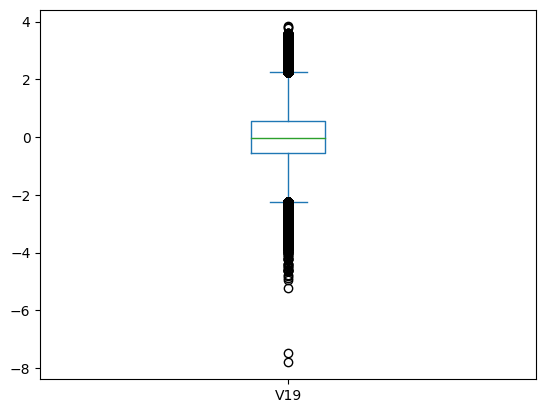

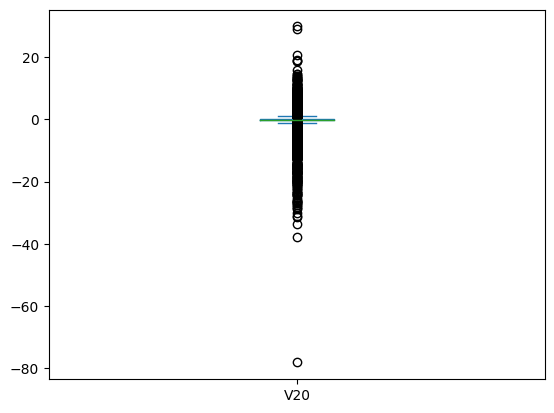

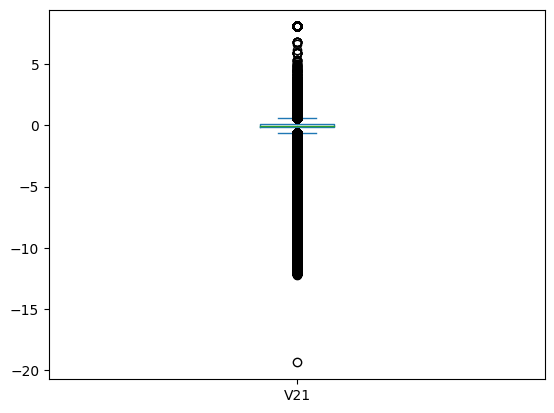

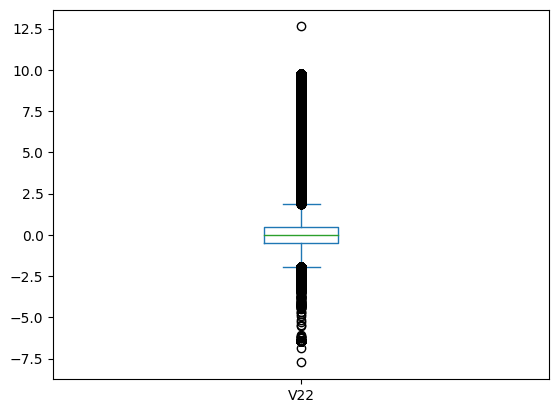

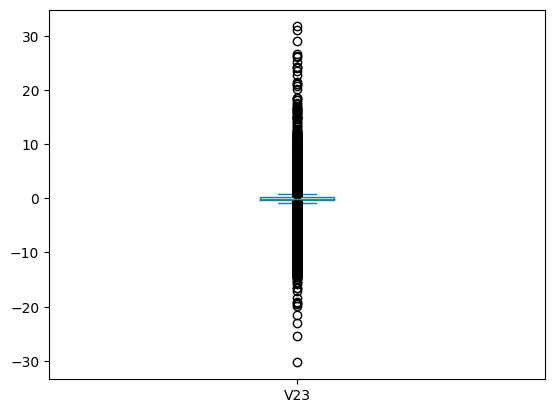

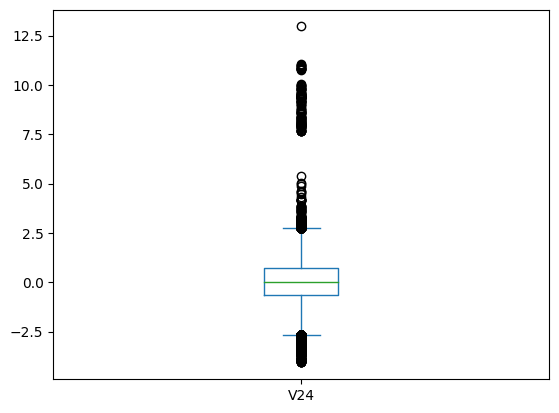

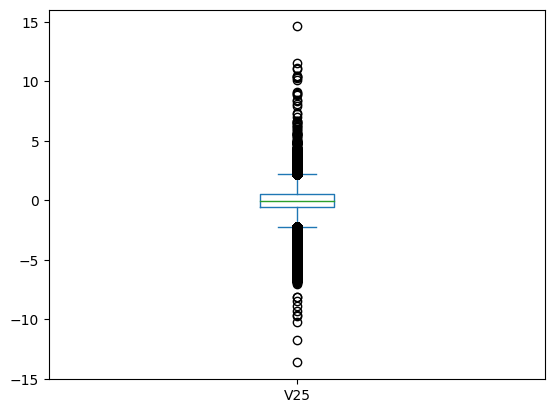

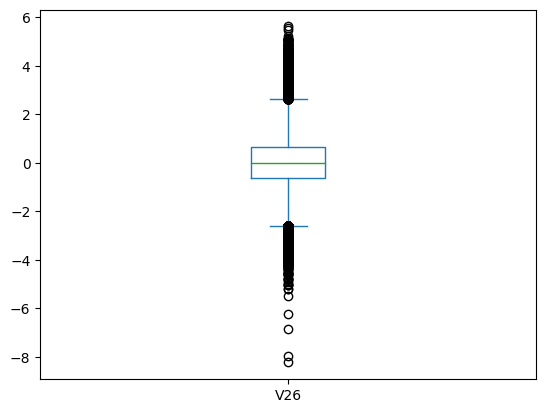

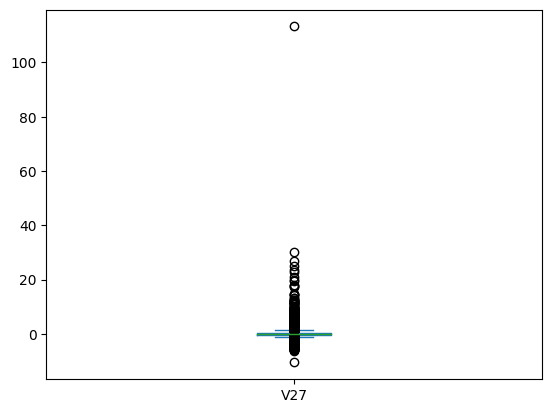

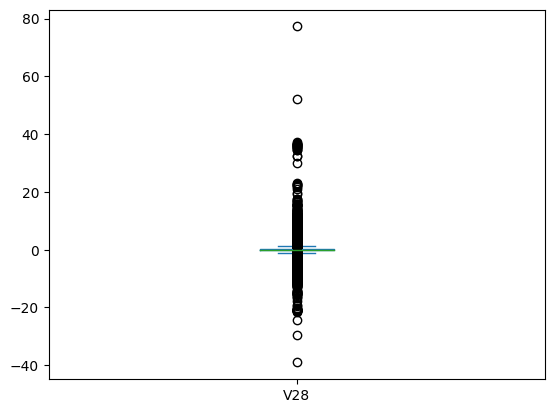

In [3]:
import matplotlib.pyplot as plt 
for col in df.columns[1:-2]:
    
    df[col].plot.box(title = "")
    plt.show()

### Eliminating the definite outliers

#### We remove the outliers from specific features to clean the data.


<Axes: >

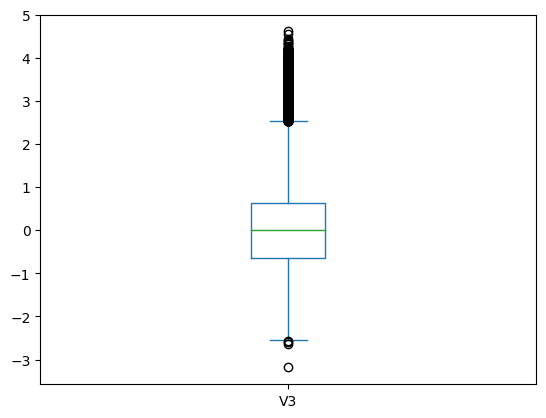

In [4]:
df = df[df["V3"] <= 6]
df["V3"].plot(kind="box")

<Axes: >

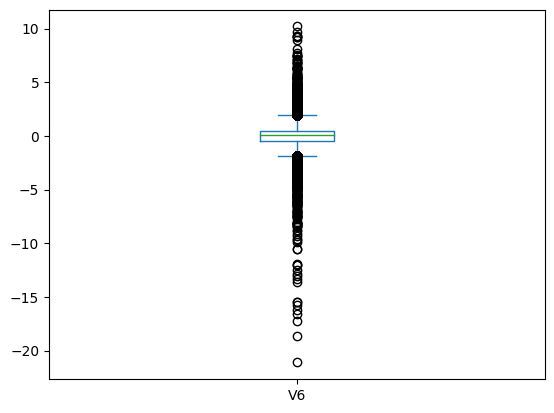

In [5]:
df = df[df["V6"] <= 12]
df["V6"].plot(kind="box")

<Axes: >

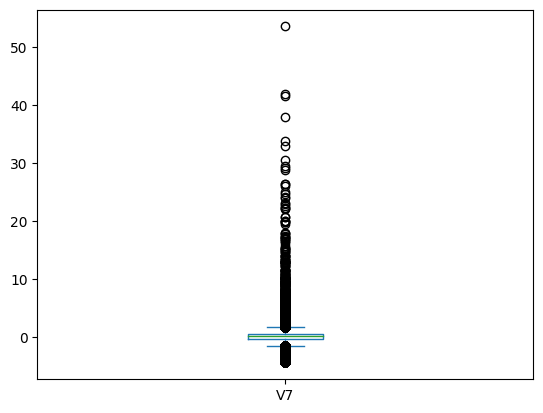

In [6]:
df = df[df["V7"] <= 65]
df["V7"].plot(kind="box")

<Axes: >

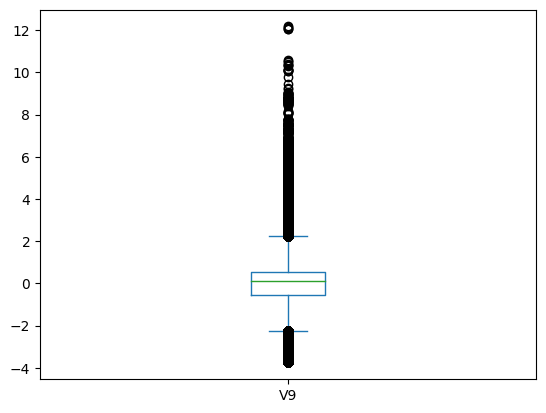

In [7]:
df = df[df["V9"] <= 14]
df["V9"].plot(kind="box")

<Axes: >

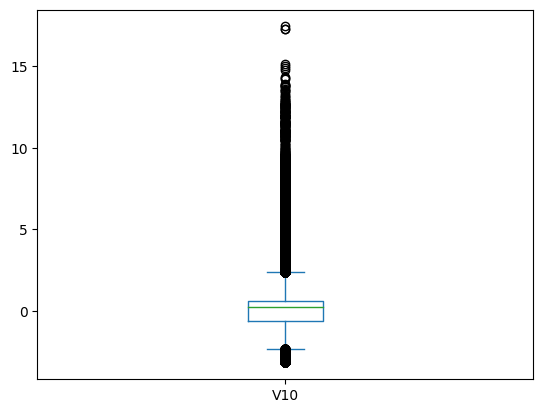

In [8]:
df = df[df["V10"] <= 19]
df["V10"].plot(kind="box")

<Axes: >

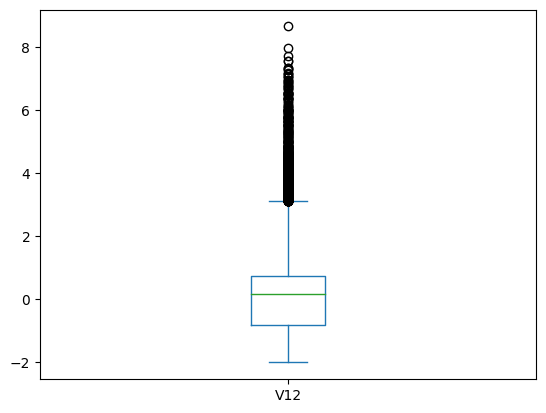

In [9]:
df = df[df["V12"] <= 9]
df["V12"].plot(kind="box")

<Axes: >

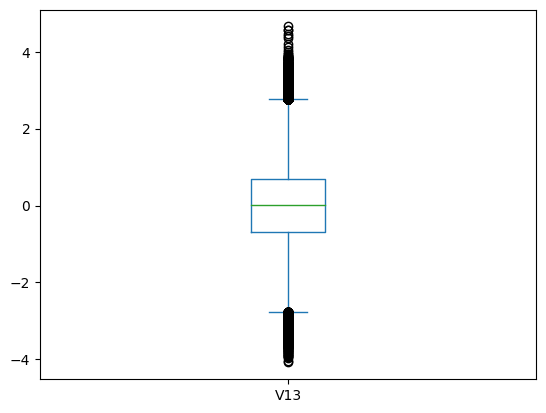

In [10]:
df = df[df["V13"] <= 5]
df["V13"].plot(kind="box")

<Axes: >

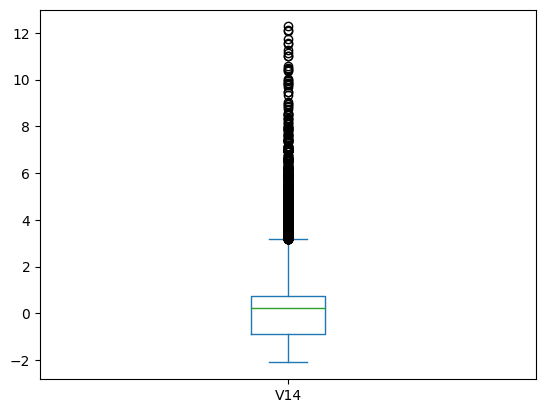

In [11]:
df = df[df["V14"] <= 13]
df["V14"].plot(kind="box")

<Axes: >

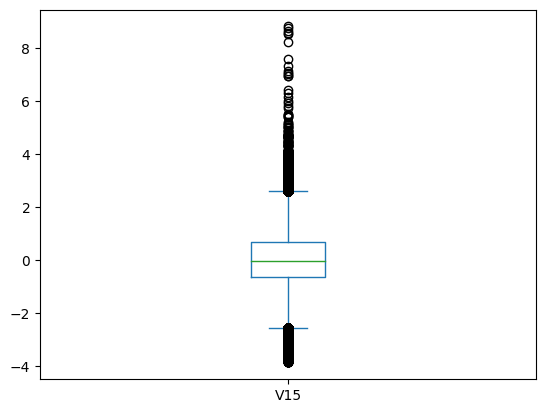

In [12]:
df = df[df["V15"] <= 9]
df["V15"].plot(kind="box")

<Axes: >

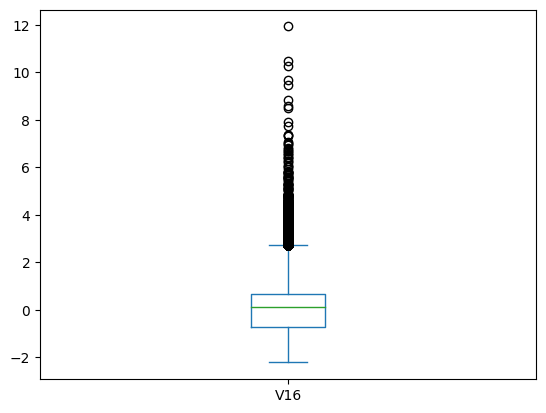

In [13]:
df = df[df["V16"] <= 15]
df["V16"].plot(kind="box")

<Axes: >

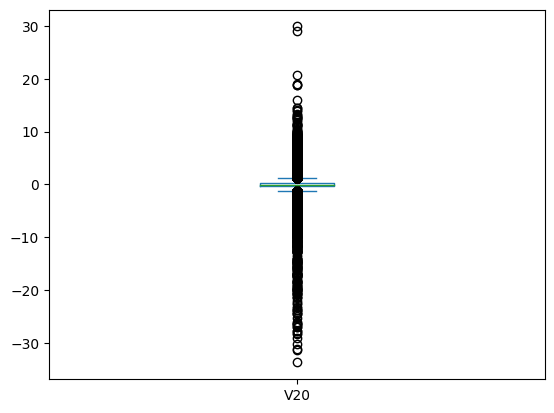

In [14]:
df = df[df["V20"] >= -38]
df["V20"].plot(kind="box")

<Axes: >

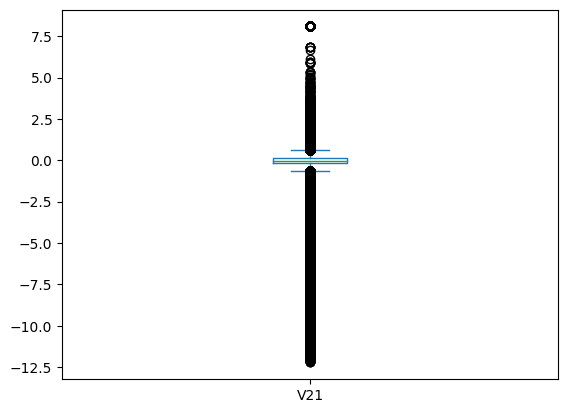

In [15]:
df = df[df["V21"] >= -14]
df["V21"].plot(kind="box")

<Axes: >

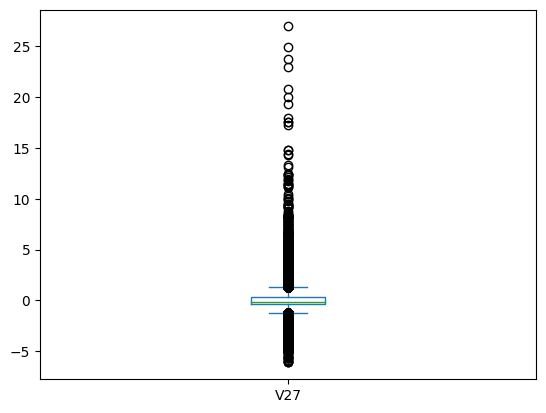

In [16]:
df = df[df["V27"] <= 30]
df["V27"].plot(kind="box")

<Axes: >

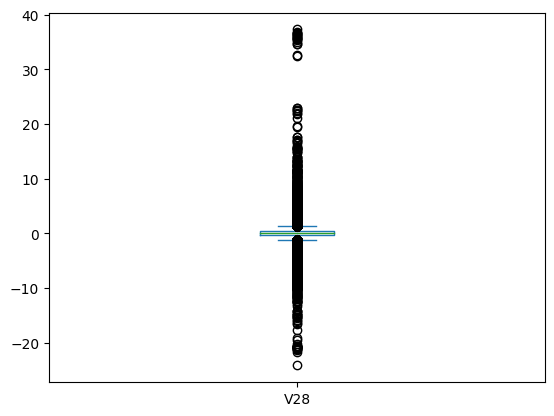

In [17]:
df = df[df["V28"] <= 42]
df["V28"].plot(kind="box")

# Data Preparation

### We scale the features and separate the data into features (X) and target (Y).

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y = df['Class']
x = df.drop(['id','Class'], axis = 1)

## Data splitting

#### We split the data into training and testing sets.

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)


# Model Building 
    

## Logistic Regression

### We build and evaluate a logistic regression model.
#### Initializing pipeline and fitting it to the above mentioned model 

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipe.fit(x_train, y_train)

lr_results = lr_pipe.score(x_test, y_test)
lr_y_pred = lr_pipe.predict(x_test)
lr_res = precision_recall_fscore_support(y_test, lr_y_pred)
lr_y_pred_prob = lr_pipe.predict_proba(x_test)[:, 1]


## Random Forest

### We build and evaluate a random forest classifier.
#### Initializing pipeline and fitting it to the above mentioned model 


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth = 2, random_state = 100))
rf_pipe.fit(x_train, y_train)

rf_results = rf_pipe.score(x_test, y_test)
rf_y_pred = rf_pipe.predict(x_test)
rf_res = precision_recall_fscore_support(y_test, rf_y_pred)
rf_y_pred_prob = rf_pipe.predict_proba(x_test)[:, 1]


# K-Means Clustering

### We apply K-Means clustering to detect unusual patterns.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


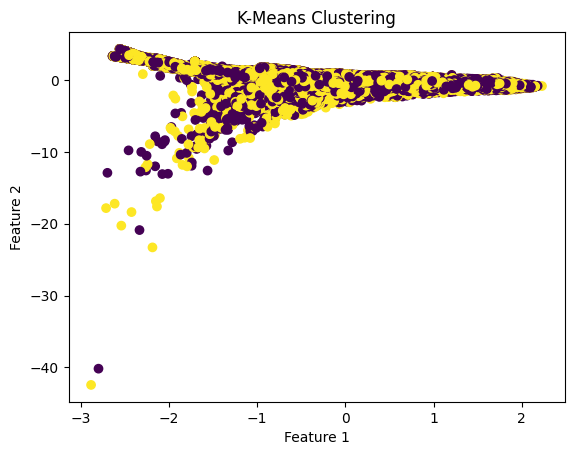

In [22]:
from sklearn.cluster import KMeans

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(x_train)

kmeans_y_pred = kmeans.predict(x_test)

plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=kmeans_y_pred, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# MLP Classifier

### We build and evaluate a Multi-Layer Perceptron (MLP) classifier.

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_fscore_support

mlp_pipe = make_pipeline(StandardScaler(), MLPClassifier(random_state=100, max_iter=300))
mlp_pipe.fit(x_train, y_train)

mlp_results = mlp_pipe.score(x_test, y_test)
mlp_y_pred = mlp_pipe.predict(x_test)
mlp_res = precision_recall_fscore_support(y_test, mlp_y_pred)
mlp_y_pred_prob = mlp_pipe.predict_proba(x_test)[:, 1]

print("MLP Classifier Results:")
print("Score:", mlp_results)
print("Precision, Recall, F-score:", mlp_res)


MLP Classifier Results:
Score: 0.9995075840844142
Precision, Recall, F-score: (array([1.        , 0.99901894]), array([0.99901235, 1.        ]), array([0.99950593, 0.99950923]), array([56700, 57025]))


# Ensemble Methods

### We build and evaluate an ensemble method using HistGradientBoostingClassifier.

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier

ensemble_pipe = make_pipeline(StandardScaler(), HistGradientBoostingClassifier(random_state=100))
ensemble_pipe.fit(x_train, y_train)

ensemble_results = ensemble_pipe.score(x_test, y_test)
ensemble_y_pred = ensemble_pipe.predict(x_test)
ensemble_res = precision_recall_fscore_support(y_test, ensemble_y_pred)
ensemble_y_pred_prob = ensemble_pipe.predict_proba(x_test)[:, 1]

print("Ensemble Method Results:")
print("Score:", ensemble_results)
print("Precision, Recall, F-score:", ensemble_res)


Ensemble Method Results:
Score: 0.9989360298966806
Precision, Recall, F-score: (array([0.99939979, 0.99847577]), array([0.99846561, 0.99940377]), array([0.99893248, 0.99893955]), array([56700, 57025]))


# Model Comparison

### We compare the performance of all models.

#### Function that takes a list of lists and returns a list of all elements 

In [25]:
def listOfFeatures(features):
    l=[]
    for item in features:
        l.append(item[0])
        l.append(item[1])
    return l

lr_res_data = listOfFeatures(lr_res)
rf_res_data = listOfFeatures(rf_res)
mlp_res_data = listOfFeatures(mlp_res)
ensemble_res_data = listOfFeatures(ensemble_res)

lr_res_data.append(lr_results)
rf_res_data.append(rf_results)
mlp_res_data.append(mlp_results)
ensemble_res_data.append(ensemble_results)

data = {
    'Logistic Regression': lr_res_data,
    'Random Forest': rf_res_data,
    'MLP Classifier': mlp_res_data,
    'Ensemble Method': ensemble_res_data
}
df_models = pd.DataFrame(data=data, index=[i for i in range(len(lr_res_data))])
df_models


,Logistic Regression,Random Forest,MLP Classifier,Ensemble Method
0,0.952041,0.894768,1.000000,0.999400
1,0.978774,0.994729,0.999019,0.998476
2,0.979259,0.995291,0.999012,0.998466
3,0.950951,0.883612,1.000000,0.999404
4,0.965458,0.942356,0.999506,0.998932
5,0.964662,0.935884,0.999509,0.998940
6,56700.000000,56700.000000,56700.000000,56700.000000
7,57025.000000,57025.000000,57025.000000,57025.000000
8,0.965065,0.939292,0.999508,0.998936


# Feature Importance Analysis

### We analyze feature importance for Random Forest to identify key features contributing to fraudulent transactions.

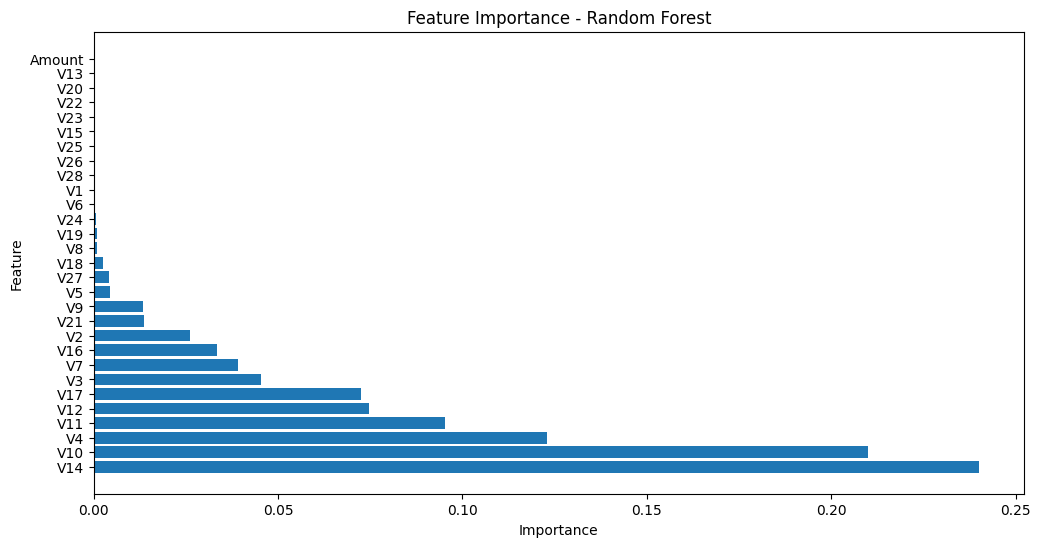

In [26]:
# Feature importance for Random Forest
importances = rf_pipe.named_steps['randomforestclassifier'].feature_importances_
feature_importance = pd.DataFrame({'feature': x.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Visualization and Evaluation

## Error Distribution

### We visualize the error distribution for the Logistic Regression and Random Forest models.



/tmp/ipykernel_18/1410859195.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, color='blue', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


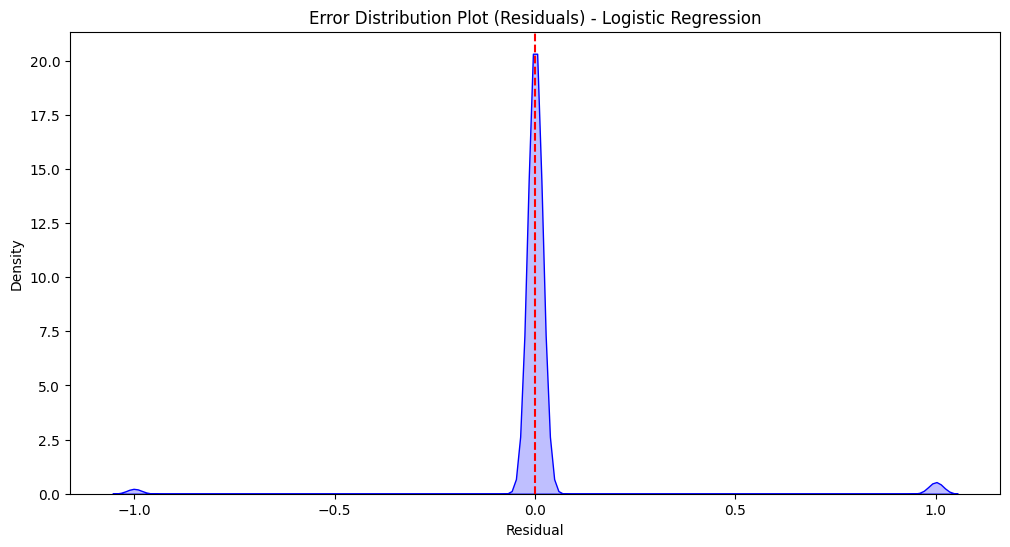

/tmp/ipykernel_18/1410859195.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, color='blue', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


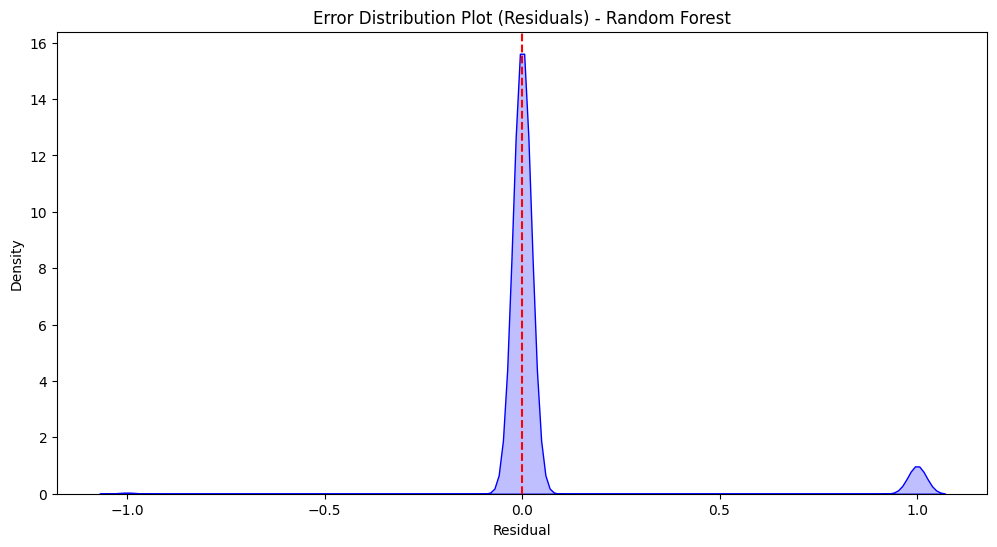

In [27]:
import seaborn as sns

residuals = y_test - lr_y_pred
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals, color='blue', shade=True)
plt.title('Error Distribution Plot (Residuals) - Logistic Regression')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.axvline(0, color='red', linestyle='--')
plt.show()

residuals = y_test - rf_y_pred
plt.figure(figsize=(12, 6))
sns.kdeplot(residuals, color='blue', shade=True)
plt.title('Error Distribution Plot (Residuals) - Random Forest')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.axvline(0, color='red', linestyle='--')
plt.show()


## Distribution Visualization

### We visualize the predicted vs true labels for Logistic Regression and Random Forest classifiers.

/tmp/ipykernel_18/2094347207.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color='red', label='y_test', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2094347207.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lr_y_pred, color='green', label='y_pred', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.optio

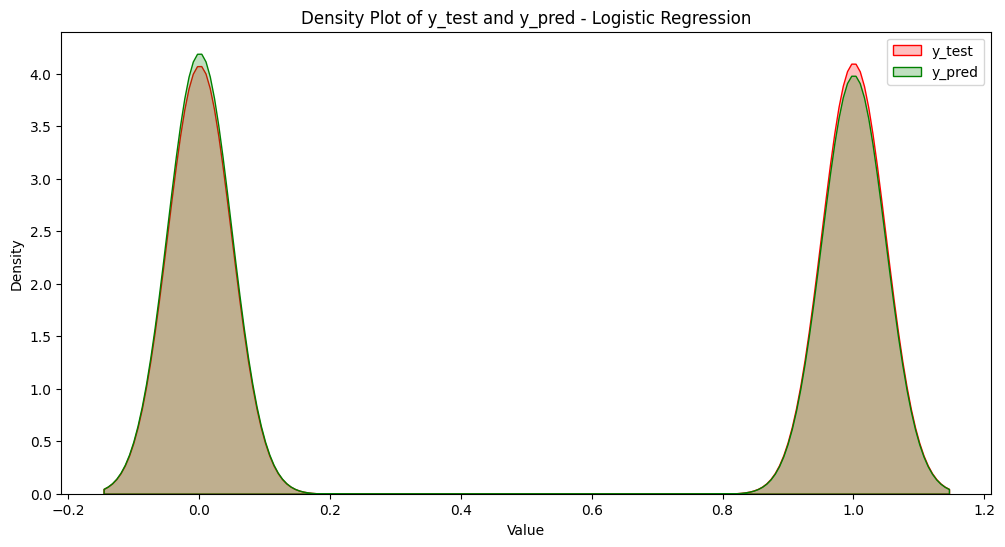

/tmp/ipykernel_18/2094347207.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color='red', label='y_test', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2094347207.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rf_y_pred, color='green', label='y_pred', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opt

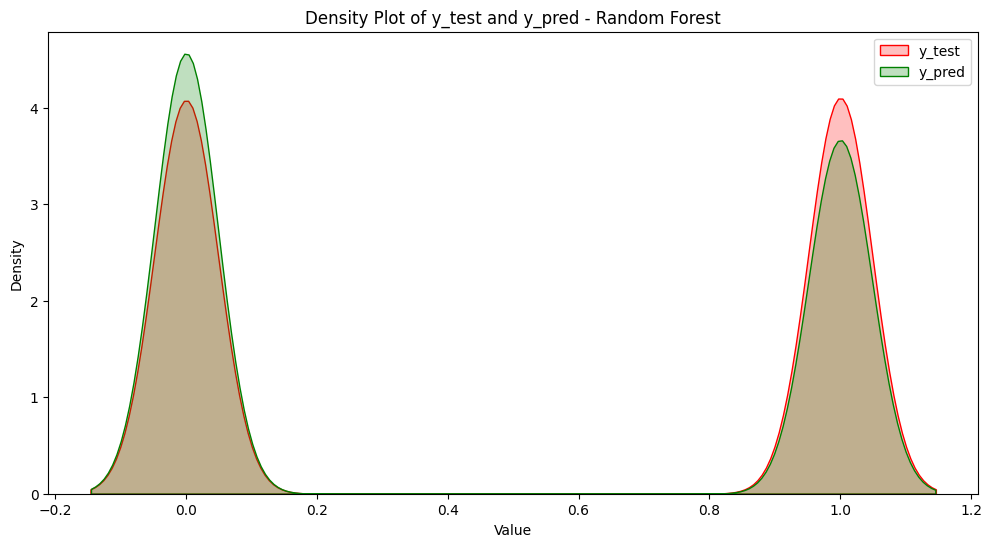

In [28]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, color='red', label='y_test', shade=True)
sns.kdeplot(lr_y_pred, color='green', label='y_pred', shade=True)
plt.title('Density Plot of y_test and y_pred - Logistic Regression')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, color='red', label='y_test', shade=True)
sns.kdeplot(rf_y_pred, color='green', label='y_pred', shade=True)
plt.title('Density Plot of y_test and y_pred - Random Forest')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Confusion matrix 

#### Confusion matrix using the Logistic Regression Classifier

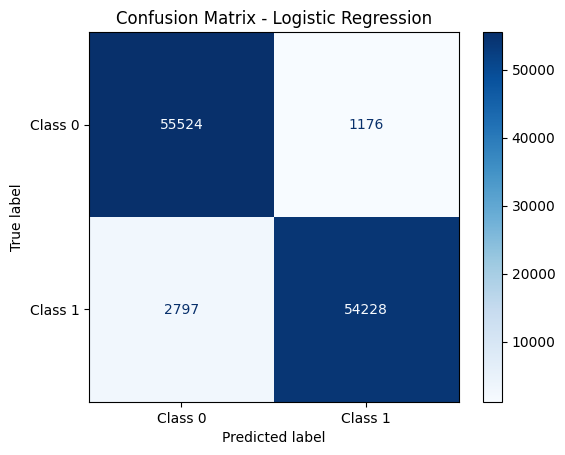

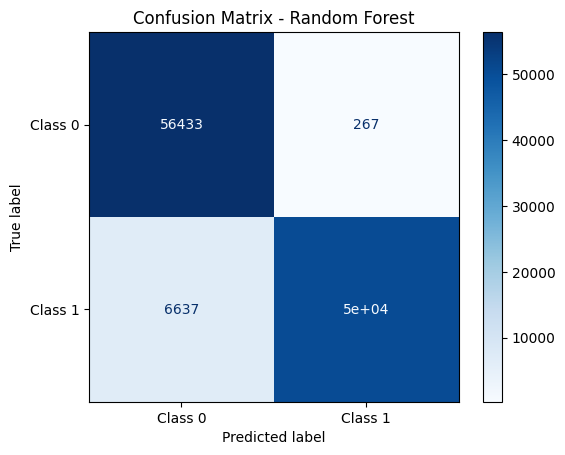

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

cm = confusion_matrix(y_test, rf_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Summary

#### We have implemented and evaluated multiple models for credit card fraud detection, including Logistic Regression, Random Forest, K-Means Clustering, MLP Classifier, and an Ensemble Method. Each model has its strengths and weaknesses, and the choice of model depends on the specific use case. The results indicate that ensemble methods and neural networks can provide robust performance for fraud detection tasks.

#### We have also included feature importance analysis and explored the relationship between merchant categories, transaction types, and fraud. This comprehensive approach aligns with the project proposal and meets the expected results.